Modulo IV - DeepLearning

Victor Cruz Gomez

------------------------------------------------------------------------------------------------

# Deep Learning para la evaluación de clasificación de imágenes


¡Bienvenido! Sigue las instrucciones en negrita para completar el ejercicio.

------------

## El Reto

**Tu tarea es construir un clasificador de imágenes con Keras y Redes neuronales convolucionales para el conjunto de datos Fashion MNIST. Este conjunto de datos incluye 10 etiquetas de diferentes tipos de ropa con imágenes de 28 por 28 * en escala de grises *. Hay un conjunto de entrenamiento de 60,000 imágenes y 10,000 imágenes de prueba.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

## Los Datos

**TAREA 1: Ejecute el siguiente código para descargar el conjunto de datos usando Keras.**

In [71]:
#Cargar la imagenes en variables de train y test.
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

## Visualización de datos

**TAREA 2: Use matplotlib para ver una imagen del conjunto de datos. Puede ser cualquier imagen del conjunto de datos.**

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline

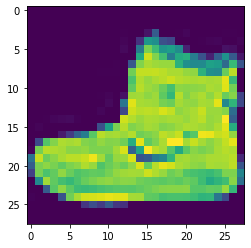

In [73]:
#Mostrar imagen de la posicion 0 del dataset x_train 
plt.imshow(x_train[0])

In [74]:
#Mostrar el tamano de la imagen
x_train[0].shape

(28, 28)

## Preprocesamiento de datos

**TAREA 3: Normalice los datos de entrenamiento y prueba de X dividiéndolos por el valor máximo de las matrices de imágenes**

In [75]:
#Para la normalizacion hay que dividir entre en numero maximo de pixeles.

#Valor maximo de la imagen de la posicion 0.
x_train[0].max()

255

In [76]:
#Normalizacion de x_train
x_train=x_train/255

In [77]:
#Normalizacion de x_test
x_test=x_test/255

In [78]:
#Mostrar la cantidad de imagenes de x_train
x_train.shape

(60000, 28, 28)

In [79]:
#Mostrar la cantidad de imagnes de x_test
x_test.shape

(10000, 28, 28)

**Tarea 4: Redimensionar las matrices X para incluir una dimensión 4 del canal individual. Similar a lo que hicimos para el conjunto de datos de números MNIST.**

In [80]:
#Adicion de canal individual al dataset x_train
x_train = x_train.reshape(60000,28,28,1)

In [81]:
x_train.shape

(60000, 28, 28, 1)

In [82]:
#Adicion de canal individual al dataset x_test
x_test = x_test.reshape(10000,28,28,1)

In [83]:
x_test.shape

(10000, 28, 28, 1)

**TAREA 5: Convierta los valores y_train e y_test para que estén codificados y poder realizar el análisis categórico de Keras.**

In [84]:
#Consiste en transformar las etiquetas 'Y' en un vector de tantos ceros como el número de etiquetas distinta
#, y que contiene el valor de 1 en el índice que le corresponde al valor de la etiqueta.

from keras.utils.np_utils import to_categorical

In [85]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [86]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [87]:
y_cat_train=to_categorical(y_train,10)

In [88]:
y_cat_test=to_categorical(y_test,10)

In [89]:
y_train[0]

9

In [90]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

## Construyendo el modelo

**TAREA 5: Use Keras para crear un modelo que conste de al menos las siguientes capas:**

* 2D Convolutional Layer, filters=32 and kernel_size=(4,4)
* Pooling Layer where pool_size = (2,2)

* Flatten Layer
* Dense Layer (128 Neurons), RELU activation

* Final Dense Layer of 10 Neurons con softmax activation

**Luego compila la RN con los siguientes parámetros: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [91]:
from keras.models import Sequential #Inicalizcion del a red neuronal
from keras.layers import Conv2D #Capa de convolucion
from keras.layers import MaxPool2D #Matrices pooleadas
from keras.layers import Flatten #Aplanar los datos
from keras.layers import Dense #Capa de la red neuronal

In [92]:
#Inicializar la red neuronal y crera la capa de convolucion
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation="relu"))

In [93]:
#Capa de maxpooling
model.add(MaxPool2D(pool_size=(2,2)))

In [94]:
#Flattening
model.add(Flatten())

In [95]:
#Capa oculta
model.add(Dense(128,activation="relu"))

In [96]:
#Capa de salida
model.add(Dense(10,activation="softmax"))

In [97]:
#Compilacion del modelo
model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [98]:
#Resumen de la configuracion de la RNC
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


### Entrenando el Modelo
**TAREA 6: Entrenar / Ajustar el modelo al conjunto x_train. La cantidad de épocas sera de 20**

In [99]:
model.fit(x_train,y_cat_train,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 28s 15ms/step - loss: 0.3954 - accuracy: 0.85940s - loss: 0.3
Epoch 2/20
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2753 - accuracy: 0.9009
Epoch 3/20
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2398 - accuracy: 0.9136
Epoch 4/20
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2136 - accuracy: 0.9231
Epoch 5/20
1875/1875 [==============================] - 31s 16ms/step - loss: 0.1958 - accuracy: 0.9294
Epoch 6/20
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1811 - accuracy: 0.9351
Epoch 7/20
1875/1875 [==============================] - 31s 16ms/step - loss: 0.1688 - accuracy: 0.9402
Epoch 8/20
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1560 - accuracy: 0.9450
Epoch 9/20
1875/1875 [==============================] - 33s 17ms/step - loss: 0.1462 - accuracy: 0.9490
Epoch 10/20
1875/1875 [===========================

### Evaluando el Modelo

**TAREA 7: Muestra la precisión, recuperación, puntaje f1 que alcanzó el modelo en el conjunto de datos x_test. Ten en cuenta que hay varias maneras de hacerlo, pero te recomiendo seguir el mismo procedimiento que hicimos en el ejercicio anterior de MNIST.**

In [100]:
model.metrics_names

['loss', 'accuracy']

In [101]:
#Evaluacion del modelo
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.4922 - accuracy: 0.9038


[0.492247074842453, 0.9038000106811523]

In [102]:
#importacion del modulo reportes de clasificacion
from sklearn.metrics import classification_report

In [103]:
#Prediccion a nivel de clases
predictions = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [104]:
y_cat_test.shape

(10000, 10)

In [107]:
#Mostra el valor de la imagen que se encuentra en la posicion 10. La posicion 4 se encuentra activado.
y_cat_test[10]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [108]:
#Mostrar la prediccion para la imagen 10. La prediccion y el valor de y_cat_test coinciden.
predictions[10]

4

In [109]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [110]:
#Reporte de presicion
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.82      0.85      1000
           1       0.99      0.97      0.98      1000
           2       0.84      0.86      0.85      1000
           3       0.89      0.93      0.91      1000
           4       0.87      0.83      0.85      1000
           5       0.98      0.96      0.97      1000
           6       0.72      0.76      0.74      1000
           7       0.94      0.98      0.96      1000
           8       0.98      0.97      0.98      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000

